## Marketing Campaign for a Bank || Opening a Term Deposit

### Introduction

Realistically, every organization is trying to generate revenue and the way to drive that is by getting customers to the business. Hence why alot of companies pay the big bucks in order to create and maintain successful marketing and advertising campaigns. Data Science can help improve such campaigns targeting the right customers based on specific factors caotured within the company's data. This project is to predict the results of the marketing campaign and figure out customer segments which have more probability to purchase products and improve targeted marketing techniques. 


This dataset is from the **UCI Machine Learning Repository** which mimics real life projects I have worked on previously in Finance.

### Task Description

**-** Perform high level and exploratory data analysis <br><br>
**-** Data Cleaning, encoding and dealing with missing and incorrect values <br><br>
**-** Utilize unsupervised learning techniques to explore customer segments and use classification techniques to predict the    marketing outcomes

### Data Attributes

**Input Variables**
1. **age** - numerical <br>
2. **job** - type of job (categorical)<br>
3. **marital** - marital status<br>
4. **education** - categorical <br>
5. **default** - categorical<br>
6. **housing** - categorical <br>
7. **default** - categorical <br>
8. **loan** - categorical <br>
9. **contact** - contact information (categorical)<br>
10. **day** - Last day of contact <br>
11. **month** - Last month of contact<br>
12. **duration** - Last contact duration (numeric)<br>
13. **campaign** - number of contacts (numeric) <br>
14. **pdays** - number of days that passed by after the client was last contacted.<br>
15. **previous** - number of contacts performed before this campaign and for this client <br>
16. **poutcome** - outcome of the previous campaign<br>

**Output Variable**
1. **Deposit** - client subscription (categorical)

### Importing Libraries and Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('bank.csv')
copy_dataset = dataset.copy()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#A Brief glimpse of the dataset
copy_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Exploratory Data Analysis

In [4]:
#Number of rows of the dataset
print("The number of rows within the Bank Marketing Dataset is:",len(dataset))

The number of rows within the Bank Marketing Dataset is: 11162


In [5]:
#Finding missing data
missing_values = dataset.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


So there are no missing values in this dataset so no need for imputation. 


In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Majority of the features are categorical so the numeric description doesn't provide much information. Lets have a view as to how the numerical data are distributed.

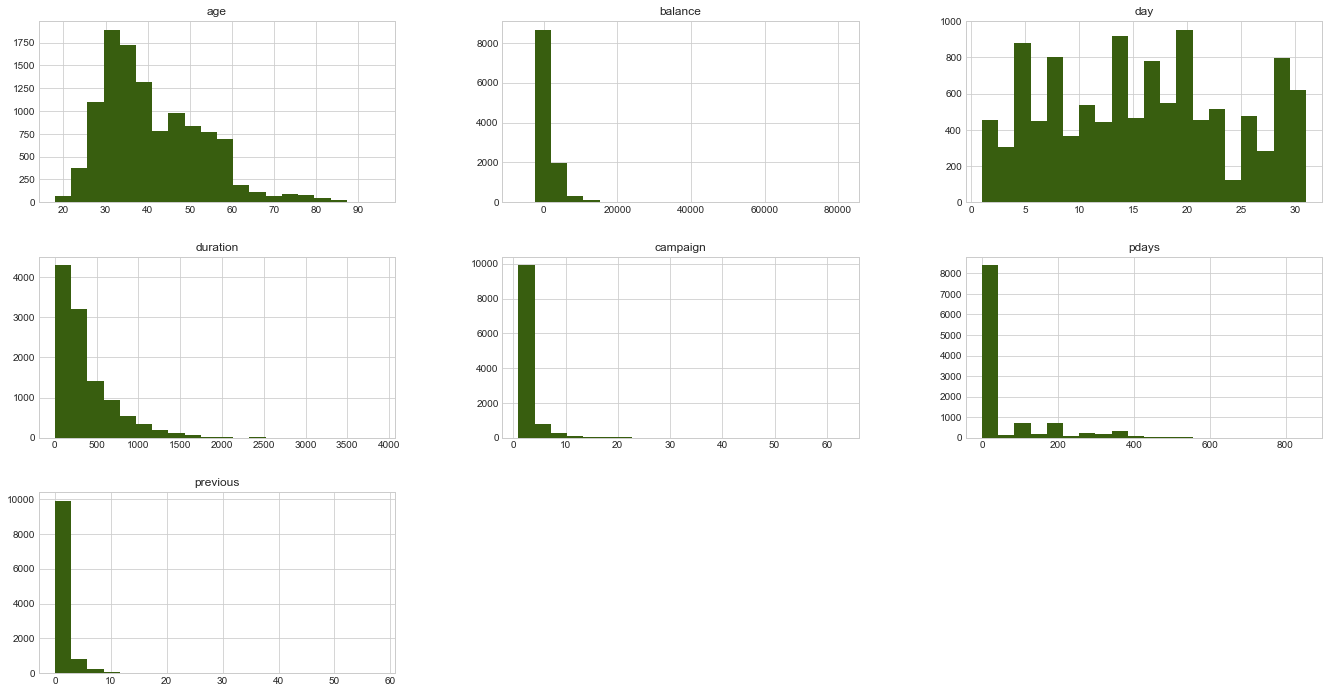

In [7]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

dataset.hist(bins=20, figsize=(23,12), color='#385E0F')
plt.show()

AttributeError: 'bool' object has no attribute 'all'

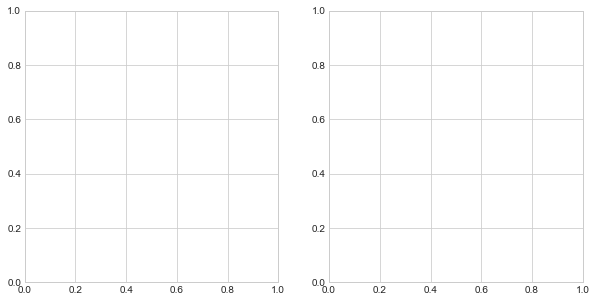

In [9]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x=dataset['loan'], y=len(dataset['deposit']), hue=dataset['deposit'], palette=['#7CFC00','#EE0000'], 
            data=dataset, estimator=lambda x: len(x), ax=ax[0])
sns.barplot(x=dataset['housing'], y=len(dataset['deposit']), hue=dataset['deposit'], palette=['#7CFC00','#EE0000'], 
            data=dataset, estimator=lambda x: len(x), ax=ax[1])
plt.show()

From the above plots, there are higher chances of customers who do not have personal loans or housing loans to open a term deposit account.

We will look to see if there is any relationship between age and opening a term deposit, going to segregate the ages within the dataset into various age groups.

In [10]:
#dataset.head()
agegroup = dataset.loc[:, ('age','deposit')]

#X_train_dat
bins= [25,40,60,75,90,120]
labels = ['18 - 25','25 - 40','40 - 60','60 - 75', '75-90']
agegroup['age'] = pd.cut(agegroup['age'], bins=bins, labels=labels, right=False)
agegroup.head()

,age,deposit
0,25 - 40,yes
1,25 - 40,yes
2,25 - 40,yes
3,25 - 40,yes
4,25 - 40,yes


AttributeError: 'bool' object has no attribute 'all'

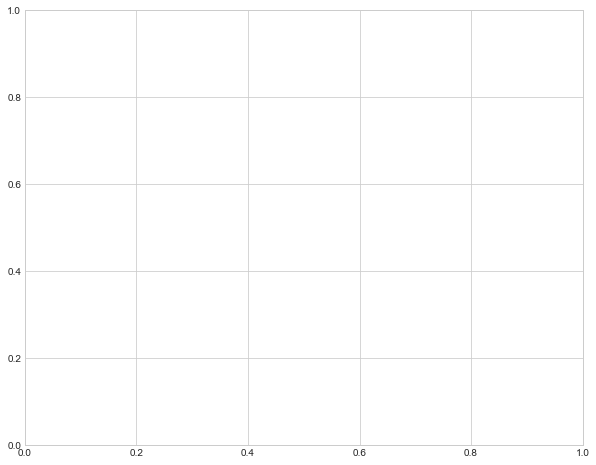

In [11]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=agegroup['age'], y=len(agegroup['deposit']), hue=agegroup['deposit'], 
            palette=['#7CFC00','#EE0000'], data=agegroup, estimator=lambda x: len(x))
#ax[1].set(ylabel="(%)")
#ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

From the above, we can see that the age from 40 and above, have a better probability to subscribe to term deposit. The age group with the lowest probability of having a successful outcome is within 25-40. However there would be other factors that would influence this such as balance, education, marketing duration etc.

AttributeError: 'bool' object has no attribute 'all'

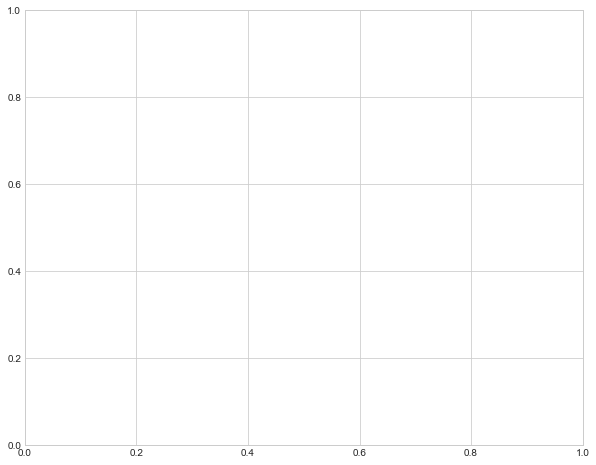

In [12]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=dataset['education'], y=len(dataset['deposit']), hue=dataset['deposit'], palette=['#7CFC00','#EE0000'], data=dataset, estimator=lambda x: len(x))
#ax[1].set(ylabel="(%)")
plt.show()

From the above chart, customers with tertiary education have higher chances than other educational categories.

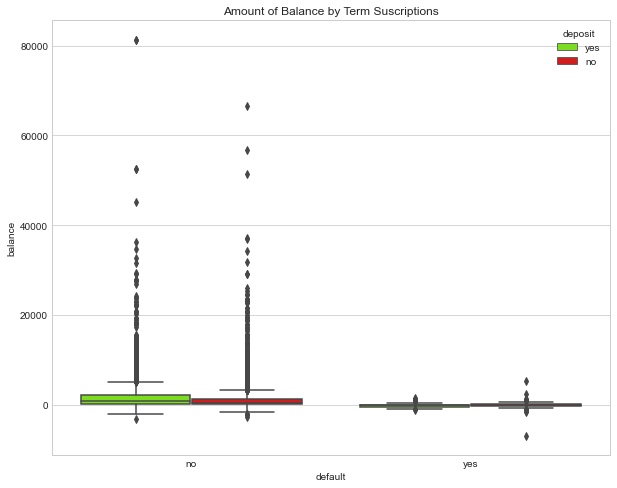

In [13]:
f, ax = plt.subplots(figsize=(10,8))
g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=dataset, palette=['#7CFC00','#EE0000'])

g.set_title("Amount of Balance by Term Suscriptions")
plt.show()

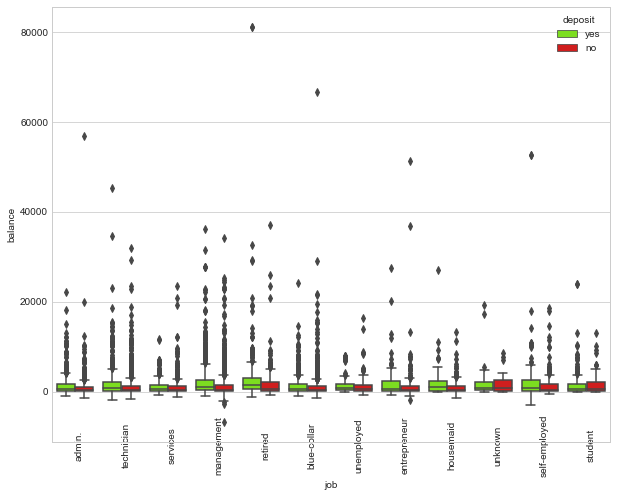

In [14]:
f, ax = plt.subplots(figsize=(10,8))
g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=dataset, palette=['#7CFC00','#EE0000'])
g1.set_xticklabels(dataset["job"].unique(), rotation=90, rotation_mode="anchor")
plt.show()


In [15]:
g_plot=sns.barplot(x=dataset['job'], y=len(dataset['deposit']), hue=dataset['deposit'], 
                   palette=['#7CFC00','#EE0000'], data=dataset, estimator=lambda x: len(x))
g_plot.set_xticklabels(dataset["job"].unique(), rotation=90)


AttributeError: 'bool' object has no attribute 'all'

Different types of job seem to have an influence on whether the customers would open a term deposit account. Blue collar having the least success which is not really a surprise.

Management, student and retired are amongst the group with higher chances of having success within could validate the age segregation, with 
Management and retired customers within the 40+ age group.

AttributeError: 'bool' object has no attribute 'all'

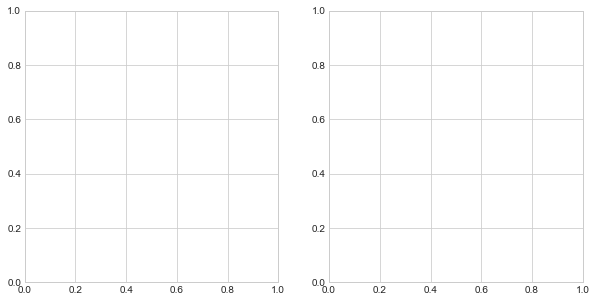

In [16]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x=dataset['marital'], y=len(dataset['deposit']), hue=dataset['deposit'],
            palette=['#7CFC00','#EE0000'], data=dataset, estimator=lambda x: len(x), ax=ax[0])
sns.barplot(x=dataset['contact'], y=len(dataset['deposit']), hue=dataset['deposit'], palette=['#7CFC00','#EE0000'], 
            data=dataset, estimator=lambda x: len(x), ax=ax[1])

Seems married people are less likely to subsribe for the term deposit subscription unlike divorced and single customers who are more likely. Single customers have the best chances based on our data.

In [153]:
#Understanding the duration
duration_status = dataset.loc[:, ('duration','deposit')]

#X_train_dat
bins=[-1,avg_duration, max(dataset['duration'])]

labels = ['below average','above average']
duration_status['duration'] = pd.cut(duration_status['duration'], bins=bins, labels=labels, right=False)
#print (duration_status)


            duration deposit
0      above average     yes
1      above average     yes
2      above average     yes
3      above average     yes
4      above average     yes
...              ...     ...
11157  below average      no
11158  below average      no
11159  below average      no
11160  below average      no
11161  above average      no

[11162 rows x 2 columns]


NameError: name 'duration_status' is not defined

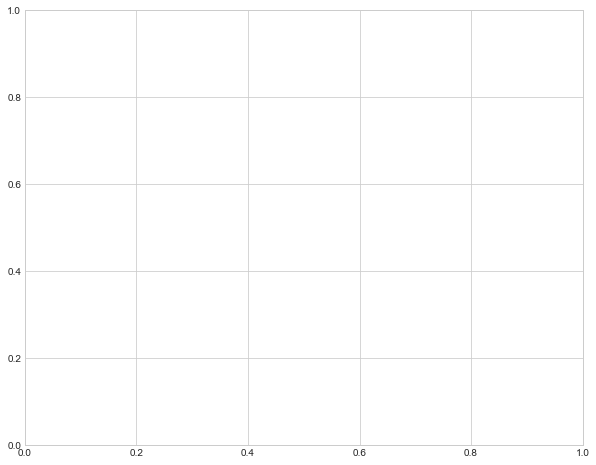

In [17]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=duration_status['duration'], y=len(['deposit']), hue=duration_status['deposit'], 
            palette=['#7CFC00','#EE0000'], data=agegroup, estimator=lambda x: len(x))

Duration of the contact with customers has an influence on the outcome, as the chances of success improve when the duration of the contact is above average.

### Encoding the categorical variables and Feature Scaling

Since a lot of the columns within the dataset are categorical, it is important to encode the data and also use One hot encodiing to avoid suggesting hierarchical relationship between the various groups.
Feature scaling will also be done using the StandardScaler().

Statisfied sampling will be done based on the data within the loan columns as the data is split 87:13 which can avoid overfitting.

In [18]:
#Stratified Sampling
dataset_copy = dataset
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset_copy, dataset_copy['loan']):
    strat_train_set = dataset_copy.loc[train_index]
    strat_test_set = dataset_copy.loc[test_index]

train_data = strat_train_set
test_data = strat_test_set



In [19]:
X_train = strat_train_set.iloc[:,:-1]
X_test = strat_test_set.iloc[:,:-1]
y_train = strat_train_set.iloc[:,-1]
y_test = strat_test_set.iloc[:,-1]

In [20]:
preprocess = make_column_transformer(
      (StandardScaler(),['age','balance','duration','day','campaign','pdays','previous']),
      (OneHotEncoder(), ['job', 'education', 'marital','month','contact','poutcome','default','loan','housing']),
       
       remainder='passthrough'
   )

In [21]:
X_train_data = preprocess.fit_transform(X_train)
X_test_data = preprocess.transform(X_test)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_data = le.fit_transform(y_train)

In [23]:
y_test_data = le.transform(y_test)

### Model Training

Going to use the following Classification Models <br><br>
- K- Nearest Neighbours<br>
- Kernel SVM<br>
- Naives Bayes<br>
- Random Forest<br>
- Xgboost<br>
- Decision Tree

And perform K-fold cross validation and grid search to find the optimal hyperparamters for Model accuracy.

In [16]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score



In [17]:
def RandomForestMode(X_train, y_train, X_test):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [18]:
def KernelSVMMode(X_train, y_train, X_test):
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [19]:
def KNNMode(X_train, y_train, X_test):
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [20]:
def DecisionTreeMode(X_train, y_train, X_test):
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [21]:
def BayesMode(X_train, y_train, X_test):
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [22]:
def XGBMode(X_train, y_train, X_test):
    classifier = XGBClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predicted = KNNMode(X_train_data, y_train_data, X_test_data)
cm = confusion_matrix(y_test_data, y_predicted)
print(cm)
accuracy_score(y_test_data, y_predicted)

[[1002  174]
 [ 256  801]]


0.8074339453649798

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predicted = RandomForestMode(X_train_data, y_train_data, X_test_data)
cm = confusion_matrix(y_test_data, y_predicted)
print(cm)
accuracy_score(y_test_data, y_predicted)

[[995 181]
 [192 865]]


0.8329601433049709

In [42]:
def ModelChecks(X_train, y_train, X_test):
    y_pred_RF = RandomForestMode(X_train, y_train, X_test)
    y_pred_KNN = KNNMode(X_train, y_train, X_test)
    y_pred_SVM = KernelSVMMode(X_train, y_train, X_test)
    y_pred_DT = DecisionTreeMode(X_train, y_train, X_test)
    y_pred_NB = BayesMode(X_train, y_train, X_test)
    y_pred_XGB = XGBMode(X_train, y_train, X_test)
    
    d = {'Classifiers': ['SVC', 'KNN', 'Dec Tree', 'Rand FC',  'Naives Bayes','XGB'], 
    'Accuracy Score': [accuracy_score(y_test_data,y_pred_SVM)*100,accuracy_score(y_test_data,y_pred_KNN)*100,
                       accuracy_score(y_test_data,y_pred_DT)*100,accuracy_score(y_test_data,y_pred_RF)*100,
                       accuracy_score(y_test_data,y_pred_NB)*100,
                       accuracy_score(y_test_data,y_pred_XGB)*100]}
    result_df = pd.DataFrame(data=d)
    return result_df

In [43]:
ModelChecks(X_train_data, y_train_data, X_test_data)

,Classifiers,Accuracy Score
0,SVC,84.639498
1,KNN,80.743395
2,Dec Tree,78.190775
3,Rand FC,83.296014
4,Naives Bayes,72.234662
5,XGB,84.012539


The best model from the prediction is the Kernel SVM with an accuracy of 84.6%.

In order to avoid overfitting a model, we will use K fold cross validation on each models.

In [27]:
svc_clf = SVC(kernel = 'rbf', random_state = 0)
svc_scores = cross_val_score(estimator = svc_clf, X = X_train_data, y = y_train_data, cv=10)
svc_mean = svc_scores.mean()*100
svc_std = svc_scores.std()*100

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(estimator = knn_clf, X = X_train_data, y = y_train_data, cv=10)
knn_mean = knn_scores.mean()*100
knn_std = knn_scores.std()*100

# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(estimator = tree_clf, X= X_train_data, y = y_train_data, cv=10)
tree_mean = tree_scores.mean()*100
tree_std = tree_scores.std()*100


# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(estimator = rand_clf, X = X_train_data, y = y_train_data, cv=10)
rand_mean = rand_scores.mean()*100
rand_std = rand_scores.std()*100

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(estimator = nav_clf, X = X_train_data, y = y_train_data, cv=10)
nav_mean = nav_scores.mean()*100
nav_std = nav_scores.std()*100

#XGB
xgb_clf = XGBClassifier()
xgb_scores = cross_val_score(estimator = xgb_clf, X = X_train_data, y = y_train_data, cv=10)
xgb_mean = xgb_scores.mean()*100
xgb_std = xgb_scores.std()*100

# Create a Dataframe with the results.
d = {'Classifiers': ['SVC', 'KNN', 'Dec Tree', 'Rand FC',  'Naives Bayes','XGB'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean, rand_mean, nav_mean,xgb_mean],
    'Standard Deviation': [svc_std, knn_std, tree_std, rand_std, nav_std, xgb_std]}
result_df = pd.DataFrame(data=d)

In [28]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores,Standard Deviation
0,SVC,85.351099,0.916393
5,XGB,84.679106,1.010515
3,Rand FC,83.704636,1.173718
1,KNN,80.322626,0.548133
2,Dec Tree,79.068038,1.130309
4,Naives Bayes,72.079804,1.171949


Kernel SVM having the highest average score and the XGBoost classifer model in close second. 

In [46]:
#Precision, Recall and F1 score for the Kernel SVM 
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

prec_score = precision_score(y_test_data, KernelSVMMode(X_train_data, y_train_data, X_test_data))
rec_score = recall_score(y_test_data, KernelSVMMode(X_train_data, y_train_data, X_test_data))
f1score = f1_score(y_test_data, KernelSVMMode(X_train_data, y_train_data, X_test_data))

print("Precison Score: {}".format(prec_score))
print("Recall Score: {}".format(rec_score))
print("F1 Score: {}".format(f1score))


Precison Score: 0.8164893617021277
Recall Score: 0.8713339640491958
F1 Score: 0.843020594965675


### Grid Search for the Support Vector Machine Model

In [492]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc_clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_data, y_train_data)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.42 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


### Feature Importance and recommendations

So in conclusion what factors would influence the result of a Term Deposit Subscription?

Using Random Forest and XGBoost feature importance to give an idea as to which features would influence the result of opening a term deposit.

In [424]:
dataset_copy = dataset

dataset_copy['job'] = dataset_copy['job'].astype('category').cat.codes
dataset_copy['housing'] = dataset_copy['housing'].astype('category').cat.codes
dataset_copy['marital'] = dataset_copy['marital'].astype('category').cat.codes
dataset_copy['contact'] = dataset_copy['contact'].astype('category').cat.codes
dataset_copy['month'] = dataset_copy['month'].astype('category').cat.codes
dataset_copy['poutcome'] = dataset_copy['poutcome'].astype('category').cat.codes
dataset_copy['loan'] = dataset_copy['loan'].astype('category').cat.codes
dataset_copy['default'] = dataset_copy['default'].astype('category').cat.codes
dataset_copy['education'] = dataset_copy['education'].astype('category').cat.codes

In [425]:
X_data = dataset_copy.iloc[:,:-1]
y_data = dataset_copy.iloc[:, -1]

In [426]:
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(X_data,y_data,test_size=0.2, random_state=42, stratify=y_data)

Feature ranking:
Feature: 0, Score: 0.08431
Feature: 1, Score: 0.03885
Feature: 2, Score: 0.01841
Feature: 3, Score: 0.02353
Feature: 4, Score: 0.00136
Feature: 5, Score: 0.08940
Feature: 6, Score: 0.03058
Feature: 7, Score: 0.01107
Feature: 8, Score: 0.04446
Feature: 9, Score: 0.07318
Feature: 10, Score: 0.07995
Feature: 11, Score: 0.36892
Feature: 12, Score: 0.03418
Feature: 13, Score: 0.04209
Feature: 14, Score: 0.02491
Feature: 15, Score: 0.03480


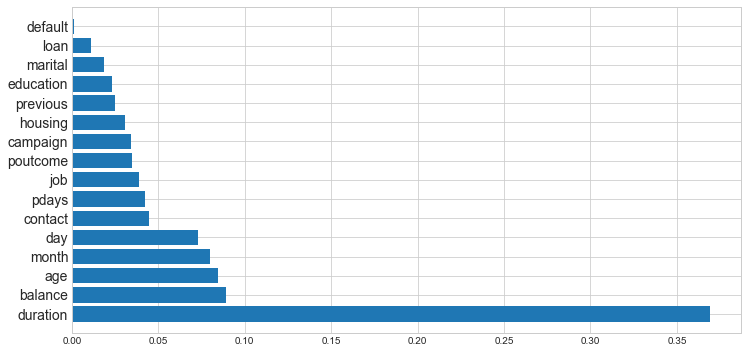

In [429]:
modelRF = RandomForestClassifier()
# fit the model
modelRF.fit(X_training, y_training)
# get importance
importances = modelRF.feature_importances_
# summarize feature importance
feature_names = X_data.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    #plt.title("Determining Feature importances \n with Random Forest Classifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices],  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
    
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

Feature: 0, Score: 0.03695
Feature: 1, Score: 0.01591
Feature: 2, Score: 0.01200
Feature: 3, Score: 0.03510
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03201
Feature: 6, Score: 0.13098
Feature: 7, Score: 0.04446
Feature: 8, Score: 0.12913
Feature: 9, Score: 0.02029
Feature: 10, Score: 0.05506
Feature: 11, Score: 0.19265
Feature: 12, Score: 0.03820
Feature: 13, Score: 0.09505
Feature: 14, Score: 0.02097
Feature: 15, Score: 0.14126


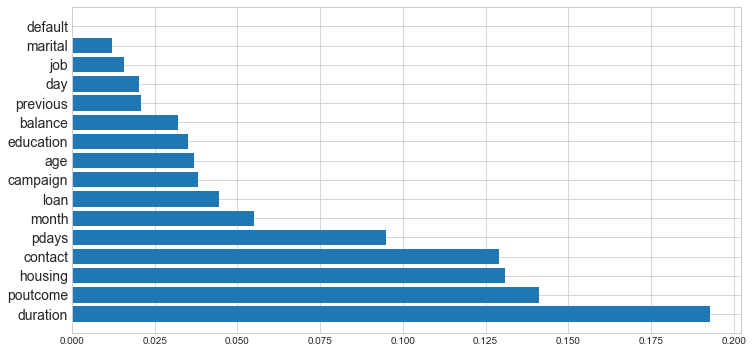

In [430]:
modelXGB = XGBClassifier()
# fit the model
modelXGB.fit(X_training, y_training)
# get importance
importancesXGB = modelXGB.feature_importances_

# summarize feature importance
feature_namesXGB = X_data.columns
indicesXGB = np.argsort(importancesXGB)[::-1]

for i,v in enumerate(importancesXGB):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
feature_importance_graph(indicesXGB, importancesXGB, feature_namesXGB)
plt.show()

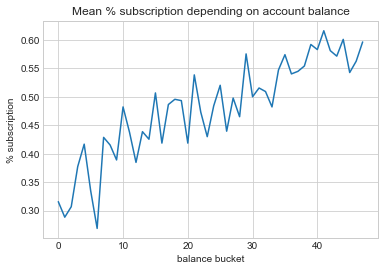

In [432]:
dataset_copy1 = dataset

dataset_copy1['balance_buckets'] = pd.qcut(dataset_copy1['balance'], 50, labels=False, duplicates = 'drop')
dataset_copy1['deposit'] = dataset_copy1['deposit'].map({'yes': 1, 'no': 0})
#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = dataset_copy1.groupby(['balance_buckets'])['deposit'].mean()



#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

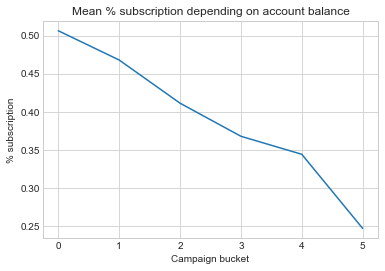

In [439]:


dataset_copy1['campaign_buckets'] = pd.qcut(dataset_copy1['campaign'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
campaign_mean_deposit = dataset_copy1.groupby(['campaign_buckets'])['deposit'].mean()



#plot
plt.plot(campaign_mean_deposit.index, campaign_mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('Campaign bucket')
plt.ylabel('% subscription')
plt.show()

In [446]:
dataset_copy1[dataset_copy1['campaign_buckets'] == 0]['campaign'].max()

2

Conculsion on the Next Marketing Campaign

Based on both the important features from both classifiers and analysis earlier, we can proffer the following suggestions.

- In terms of customer's balance, the customers with higher bank balance have better chances of opening a term deposit. The Bank should target these customers with balance over $2000 as they have higher probability to subscribe.
- The Bank should focus marketing on age groups between 18-25 and over 40 years, these age groups are more likely to subscribe to a term deposit.
- Contact duration is influential in predicting if the customer will subscribe or not. It is important to have the customer service representative be more courteous maybe through training procedures necause as the longer the contact the higher the chances of subscribing to a term deposit.
- Number of contacts does matter based on the data, as we can see from the chart, the number of contacts should not exceed 2 or 3 calls as the chances of getting a customer to open a term deposit account diminishes as the number of contacts increases.
- Based on job categories, student, Management and Retired customers did have high chances for customer subscription and the next marketing campaign could involve school's outreach and reaching to customers within these groups.
- Customers with personal loans or housing loans are less likely to open a term deposit account, marketing should target those without these loans and within the customers that have loans, also look at their balances, job and age.

### Use Neural Network to perform Regression

In [39]:
import tensorflow as tf

In [40]:
ann = tf.keras.models.Sequential()

#### Adding input layer and three hidden layers

In [41]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

#### Adding the output layer

In [42]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiling the ANN and Training the ANN

In [43]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
ann.fit(X_train_data, y_train_data, batch_size = 32, epochs = 100)

Train on 8929 samples
Epoch 1/100
8929/8929 [==============================] - 1s 109us/sample - loss: 0.5799 - accuracy: 0.6986
Epoch 2/100
8929/8929 [==============================] - 1s 62us/sample - loss: 0.4087 - accuracy: 0.8204
Epoch 3/100
8929/8929 [==============================] - 1s 65us/sample - loss: 0.3836 - accuracy: 0.8326
Epoch 4/100
8929/8929 [==============================] - 1s 66us/sample - loss: 0.3753 - accuracy: 0.8364
Epoch 5/100
8929/8929 [==============================] - 1s 62us/sample - loss: 0.3711 - accuracy: 0.8392
Epoch 6/100
8929/8929 [==============================] - 1s 62us/sample - loss: 0.3684 - accuracy: 0.8403
Epoch 7/100
8929/8929 [==============================] - 1s 64us/sample - loss: 0.3631 - accuracy: 0.8437
Epoch 8/100
8929/8929 [==============================] - 1s 62us/sample - loss: 0.3601 - accuracy: 0.8433
Epoch 9/100
8929/8929 [==============================] - 1s 62us/sample - loss: 0.3583 - accuracy: 0.8461
Epoch 10/100
8929/8929 

8929/8929 [==============================] - 1s 71us/sample - loss: 0.3041 - accuracy: 0.8747
Epoch 78/100
8929/8929 [==============================] - 1s 72us/sample - loss: 0.3055 - accuracy: 0.8760
Epoch 79/100
8929/8929 [==============================] - 1s 68us/sample - loss: 0.3021 - accuracy: 0.8769
Epoch 80/100
8929/8929 [==============================] - 1s 72us/sample - loss: 0.3027 - accuracy: 0.8768
Epoch 81/100
8929/8929 [==============================] - 1s 71us/sample - loss: 0.3011 - accuracy: 0.8792
Epoch 82/100
8929/8929 [==============================] - 1s 71us/sample - loss: 0.3020 - accuracy: 0.8757
Epoch 83/100
8929/8929 [==============================] - 1s 68us/sample - loss: 0.3033 - accuracy: 0.8767
Epoch 84/100
8929/8929 [==============================] - 1s 72us/sample - loss: 0.3014 - accuracy: 0.8794
Epoch 85/100
8929/8929 [==============================] - 1s 70us/sample - loss: 0.3030 - accuracy: 0.8768
Epoch 86/100
8929/8929 [==========================

In [45]:
y_pred = ann.predict(X_test_data)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_data.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_data, y_pred)
print(cm)
accuracy_score(y_test_data, y_pred)

[[964 212]
 [122 935]]


0.8504254366323332

After changing the number of layers, and increasing the number of units. I am seeing better results, these are the hyperparameters that need to be tuned. It seems that the Neural Network Classification performed better than most of the machine learning algorithms, depending on the task at hand I would have required more layers but less layers was used in order to perform regularization.